<a href="https://colab.research.google.com/github/ddong1230/CSC4850-MachineLearning-Assignment2/blob/main/Dong_Dylan_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: <u>Dylan Dong</u>**

**Graduate / <u>Undergraduate</u>**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [51]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Wine dataset from sklearn:

In [52]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()

# Question 1 (10 points)

What can you say about the dataset (use code to descirbe it)? any particular things of interest? Find at least two things that you find interesting.

In [53]:
##### Code block for Question 1

# There are no null values
# The data is clean

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

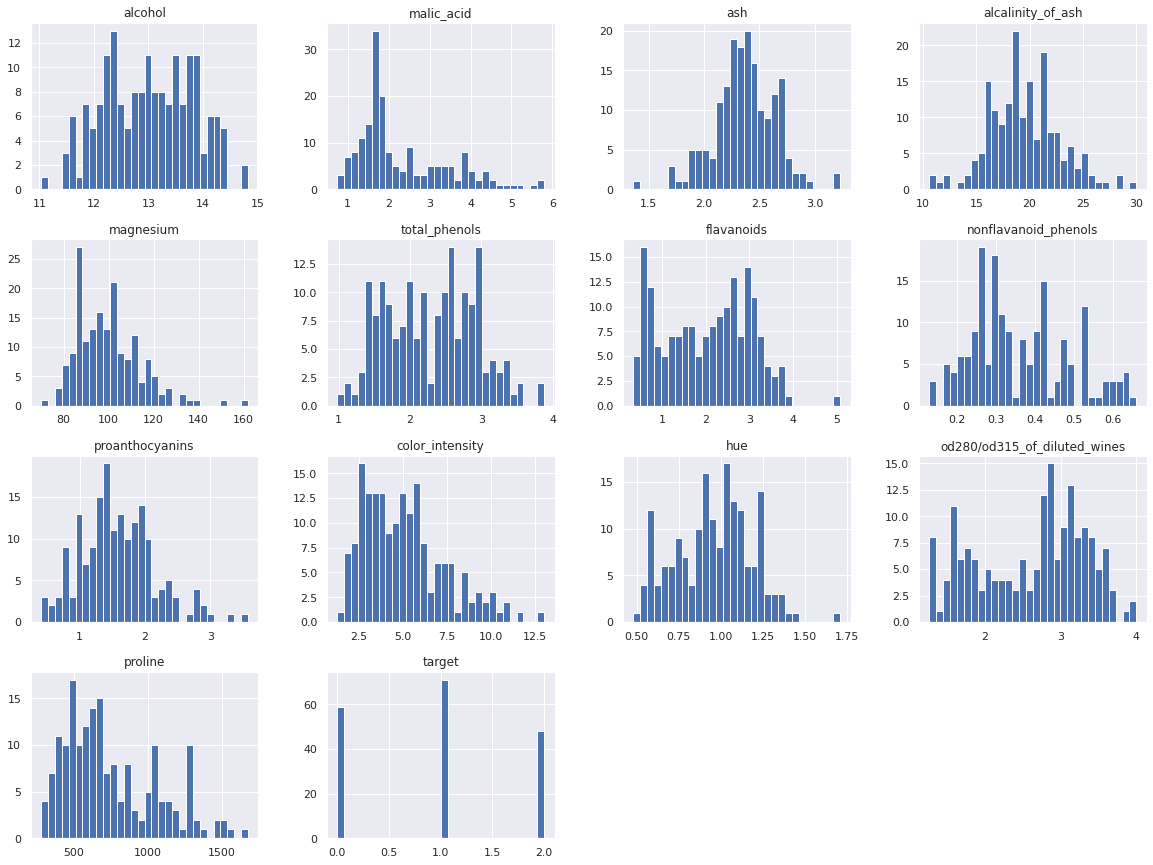

In [54]:
# Not all features are normally distributed

df.hist(bins=30, figsize = (20,15))
plt.show()

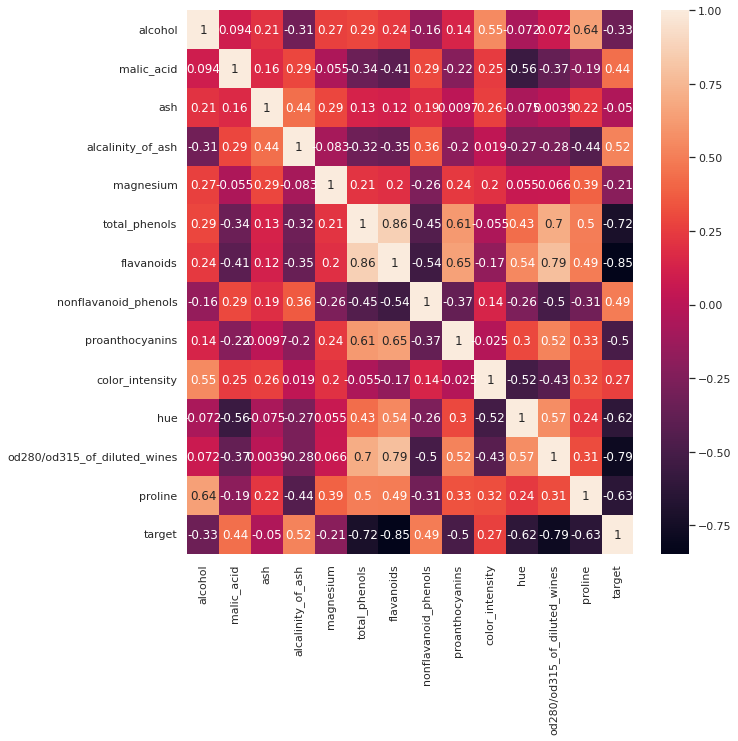

In [55]:
# 'total_phenois' is strongly correlated to 'flavanoids'
# 'od280/od315_of_diluted_wines' is strongly correlated to 'flavanoids'
# 'total_phenois' is strongly correlated to 'od280/od315_of_diluted_wines'

correlations = df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, annot = True)
plt.show()

Textual answer to question 1 goes here.

1. There are no null values.
2. The data is clean.
3. Not all features are normally distributed.
4. 'total_phenois' is strongly correlated to 'flavanoids'.
5. 'od280/od315_of_diluted_wines' is strongly correlated to 'flavanoid'.
6. 'total_phenois' is strongly correlated to 'od280/od315_of_diluted_wines'.

# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [56]:
##### Code block for Question 2

from sklearn.model_selection import train_test_split

df = df.loc[df['target'] != 2]
X = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1234)

# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [57]:
##### Code block for Question 3

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

m_perceptron = Perceptron(random_state=1234).fit(X_train, y_train.values.ravel())
y_pred = m_perceptron.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.6739130434782609


# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [58]:
##### Code block for Question 4

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=[0, 1]))

# Save scores to list for question 17
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = []
precision = []
recall = []
f1 = []

accuracy.append(round(report['accuracy'], 2))
precision.append(round(report['weighted avg']['precision'], 2))
recall.append(round(report['weighted avg']['recall'], 2))
f1.append(round(report['weighted avg']['f1-score'], 2))

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.64      1.00      0.78        27

    accuracy                           0.67        46
   macro avg       0.82      0.61      0.57        46
weighted avg       0.79      0.67      0.60        46



Textual answer to question 4 goes here.
1. All of the predictions for class_0 is correct, because only 4 data points are predicted as class_0.
2. The model detects all positive cases for class_1, because most of the data points in this model is predicted as class_1.
3. class_1 has the better f1-score (possibly due to class_1 having more data points than class_0)

# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

In [59]:
##### Code block for Question 5 - part 1

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
print('\nConfusion Matrix: ')
cm_df


Confusion Matrix: 


,0,1
0,4,15
1,0,27


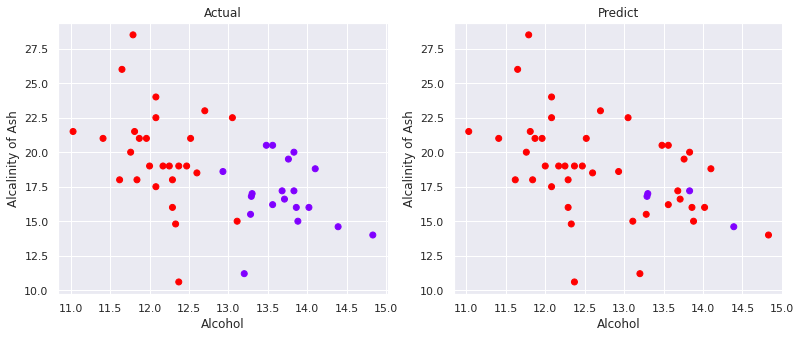

In [60]:
##### Code block for Question 5 - part 2

df_test = df.loc[y_test.index]
df_test['predict'] = y_pred

fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax[0].set_title('Actual')
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Alcalinity of Ash')
ax[0].scatter(df_test['alcohol'], df_test['alcalinity_of_ash'], c=df_test['target'], cmap='rainbow')

ax[1].set_title('Predict')
ax[1].set_xlabel('Alcohol')
ax[1].set_ylabel('Alcalinity of Ash')
ax[1].scatter(df_test['alcohol'], df_test['alcalinity_of_ash'], c=df_test['predict'], cmap='rainbow')
plt.show()

# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Textual answer to question 6 a goes here.

Yes, the right plot on Question 5 - part 2 matches the confution matrix of part 1.

Textual answer to question 6 b goes here.

1. Most of the predictions are class_1.
2. The target is not highly dependent on alcohol and alcalinity of ash.

# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [61]:
##### Code block for Question 7

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
X = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1234)

# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [62]:
##### Code block for Question 8

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9365079365079365


# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [63]:
##### Code block for Question 9

print(classification_report(y_test, y_pred))

# Save scores to list for question 17
report = classification_report(y_test, y_pred, output_dict=True)
accuracy.append(round(report['accuracy'], 2))
precision.append(round(report['weighted avg']['precision'], 2))
recall.append(round(report['weighted avg']['recall'], 2))
f1.append(round(report['weighted avg']['f1-score'], 2))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.92      0.92      0.92        26
           2       0.90      1.00      0.95        18

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



Textual answer to question 9 goes here.
1. All of the predictions for class_0 is correct.
2. The model detects all positive cases for class_2.
3. This model has the same macro avg and weighted avg which means all three classes are weighted the same.

# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

In [64]:
##### Code block for Question 10 - part 1

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
print('\nConfusion Matrix: ')
cm_df


Confusion Matrix: 


,0,1,2
0,17,2,0
1,0,24,2
2,0,0,18


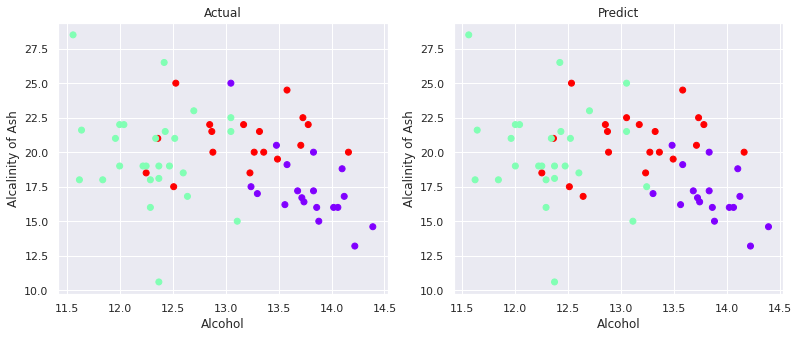

In [65]:
##### Code block for Question 10 - part 2

df_test = df.loc[y_test.index]
df_test['predict'] = y_pred

fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax[0].set_title('Actual')
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Alcalinity of Ash')
ax[0].scatter(df_test['alcohol'], df_test['alcalinity_of_ash'], c=df_test['target'], cmap='rainbow')

ax[1].set_title('Predict')
ax[1].set_xlabel('Alcohol')
ax[1].set_ylabel('Alcalinity of Ash')
ax[1].scatter(df_test['alcohol'], df_test['alcalinity_of_ash'], c=df_test['predict'], cmap='rainbow')
plt.show()

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

Textual answer to question 11 a goes here.

Yes, the right plot on Question 10 - part 2 matches the confution matrix of part 1.

Textual answer to question 11 b goes here.

1. The data point (~12.7, ~17.4) is classified incorrectly possibly due to it being close to the data point of the same class.
2. The data point (~13.2, ~17.5) is classified completely differently than the classes that is near to the data point.

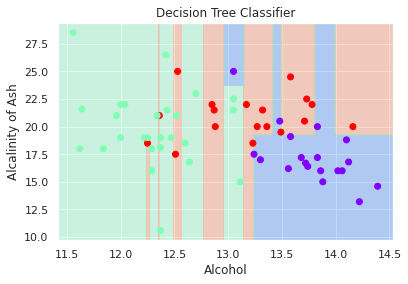

In [66]:
##### Code block for Question 11 - part c

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(df_test['alcohol'], df_test['alcalinity_of_ash'], c=df_test['target'], cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.set_title('Decision Tree Classifier')
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Alcalinity of Ash')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(df_test[['alcohol', 'alcalinity_of_ash']].values, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

visualize_classifier(DecisionTreeClassifier(), X_test, y_test)

# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [67]:
##### Code block for Question 12

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
X = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1234)

# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [68]:
##### Code block for Question 13

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=1234).fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.9523809523809523


# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [69]:
##### Code block for Question 14

print(classification_report(y_test, y_pred))

# Save scores to list for question 17
report = classification_report(y_test, y_pred, output_dict=True)
accuracy.append(round(report['accuracy'], 2))
precision.append(round(report['weighted avg']['precision'], 2))
recall.append(round(report['weighted avg']['recall'], 2))
f1.append(round(report['weighted avg']['f1-score'], 2))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.96      0.92      0.94        26
           2       0.90      1.00      0.95        18

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.95      0.95      0.95        63



Textual answer to question 14 goes here.
1. This model has very similar performance comparing to the decision tree classifier.
2. All of the predictions for class_0 is correct.
3. The model detects all positive cases for class_2.
4. This model has a slightly higher recall macro avg than weighted avg, so it means class_2 might has a lower weight.

# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

In [70]:
##### Code block for Question 15 - part 1

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
print('\nConfusion Matrix: ')
cm_df


Confusion Matrix: 


,0,1,2
0,18,1,0
1,0,24,2
2,0,0,18


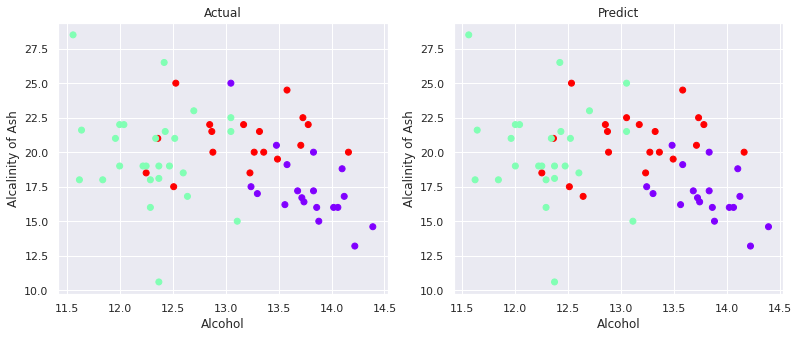

In [71]:
##### Code block for Question 15 - part 2

df_test = df.loc[y_test.index]
df_test['predict'] = y_pred

fig, ax = plt.subplots(1, 2, figsize=(13,5))
ax[0].set_title('Actual')
ax[0].set_xlabel('Alcohol')
ax[0].set_ylabel('Alcalinity of Ash')
ax[0].scatter(df_test['alcohol'], df_test['alcalinity_of_ash'], c=df_test['target'], cmap='rainbow')

ax[1].set_title('Predict')
ax[1].set_xlabel('Alcohol')
ax[1].set_ylabel('Alcalinity of Ash')
ax[1].scatter(df_test['alcohol'], df_test['alcalinity_of_ash'], c=df_test['predict'], cmap='rainbow')
plt.show()

# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Textual answer to question 16 a goes here.

Yes, the right plot on Question 15 - part 2 matches the confution matrix of part 1.

Textual answer to question 16 b goes here.

1. This model is able to classify (~13.2, ~17.5) correctly as oppose to the Decision Tree Classifier.
2. The only difference between Logistic Regression and Decision Tree in terms of the performance is data point (~13.2, ~17.5).

# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [72]:
##### Code block for Question 17

algorithm = ['Perceptron', 'Decision Tree', 'Logistic Regression']

df_model = pd.DataFrame()
df_model['Algorithm'] = algorithm
df_model['Accuracy'] = accuracy
df_model['Precision'] = precision
df_model['Recall'] = recall
df_model['F1_score'] = f1
df_model

,Algorithm,Accuracy,Precision,Recall,F1_score
0,Perceptron,0.67,0.79,0.67,0.60
1,Decision Tree,0.94,0.94,0.94,0.94
2,Logistic Regression,0.95,0.95,0.95,0.95


Textual answer to question 17 goes here.

Logistic Regression is the best model because it has the best accuracy, precision, recall, and f1 score.

# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


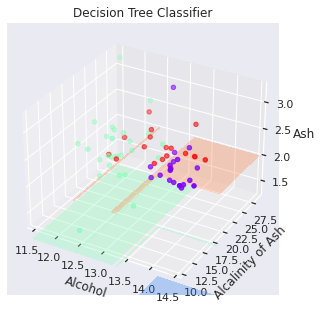

In [75]:
##### Code block for Graduate Student Question

tree = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
y_pred = tree.predict(X_test)

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    fig = plt.figure(figsize=(13,5))
    ax = fig.add_subplot(projection='3d')
    
    # Plot the training points
    ax.scatter(df_test['alcohol'], df_test['alcalinity_of_ash'], df_test['ash'], c=df_test['target'], cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.set_title('Decision Tree Classifier')
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Alcalinity of Ash')
    ax.set_zlabel('Ash')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()
    
    # fit the estimator
    model.fit(df_test[['alcohol', 'alcalinity_of_ash', 'ash']].values, y)
    xx, yy, zz = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200),
                         np.linspace(*zlim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx[:, :, 0], yy[:, :, 0], Z[:, :, 0], alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim, zlim=zlim)
    plt.show()

visualize_classifier(DecisionTreeClassifier(), X_test, y_test)